In [2]:
# https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

## Read

In [3]:
train_raw = pd.read_csv("train.csv", index_col=None)
test_raw = pd.read_csv("test.csv", index_col=None)

# train_pre = pd.read_csv("train_pre_13_add_more_ftrs_2.csv")
# test_pre = pd.read_csv("test_pre_13_add_more_ftrs_2.csv")

train_raw.shape

(1521787, 23)

In [4]:
train_raw.tail()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
1521782,6322,91008,15189,578.38,5,75,Y,8,NaN,NaN,...,0,4,191642.0,209,38222,N,5817,102,0,1478280
1521783,3226,145107,116252,435.32,5,75,Y,8,NaN,NaN,...,0,13,102338.0,192,90135,N,1458,102,0,661087
1521784,6769,162168,93598,1.38,5,75,Y,8,NaN,NaN,...,0,29,234618.0,373,79246,N,5817,102,0,167073
1521785,6032,45406,197460,1.38,5,75,Y,2,NaN,NaN,...,0,24,215218.0,373,79246,N,5817,102,0,338215
1521786,6716,48723,176440,406.59,5,75,N,5,NaN,NaN,...,0,13,163603.0,251,69607,N,2310,102,0,1055258


In [5]:
train_raw.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06
mean,6.008003e+03,8.209027e+04,1.089170e+05,6.547219e+02,4.829368e+00,5.383324e+01,4.149114e+00,1.337572e-02,4.749410e+00,4.962784e-02,4.532732e+01,1.463152e+05,2.978089e+02,5.589022e+04,4.755128e+03,9.565116e+01,2.485499e-02,9.711265e+05
std,1.502420e+03,4.736249e+04,6.090363e+04,4.028078e+02,6.513408e-01,2.072135e+01,2.394259e+00,1.148774e-01,1.111927e+00,3.652493e-01,2.601889e+01,5.212107e+04,7.796778e+01,3.082297e+04,1.979815e+03,1.890027e+01,2.216804e-01,5.641322e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.140300e+04,5.763500e+04,4.370600e+02,5.000000e+00,6.200000e+01,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.300000e+01,1.109310e+05,2.500000e+02,3.377400e+04,3.795000e+03,1.020000e+02,0.000000e+00,4.869475e+05
50%,6.716000e+03,8.191200e+04,1.097850e+05,5.919000e+02,5.000000e+00,6.200000e+01,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,4.500000e+01,1.515220e+05,2.640000e+02,5.936000e+04,5.817000e+03,1.020000e+02,0.000000e+00,9.795800e+05
75%,6.769000e+03,1.230590e+05,1.618760e+05,8.073400e+02,5.000000e+00,6.200000e+01,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,6.800000e+01,1.858270e+05,3.430000e+02,7.920000e+04,5.817000e+03,1.020000e+02,0.000000e+00,1.455200e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+01,1.000000e+00,9.000000e+00,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


## Check target variable

No Frauds 98.66 % of the dataset
Frauds 1.34 % of the dataset
0    1501432
1      20355
Name: fraud_ind, dtype: int64


Text(0.5,1,'Class Distributions \n (0: No Fraud || 1: Fraud)')

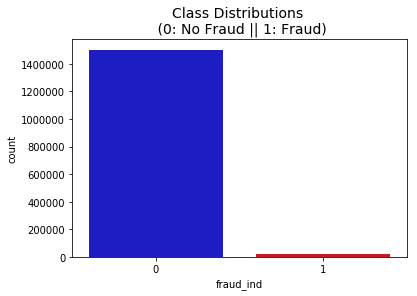

In [5]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(train_raw["fraud_ind"].value_counts()[0]/len(train_raw) * 100, 2), '% of the dataset')
print('Frauds', round(train_raw["fraud_ind"].value_counts()[1]/len(train_raw) * 100, 2), '% of the dataset')

print(train_raw["fraud_ind"].value_counts())
colors = ["#0101DF", "#DF0101"]

sns.countplot('fraud_ind', data=train_raw, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

__Note:__ Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!


## Check each variable

### Keys

In [6]:
# txkey: 交易序號為key欄
for col in train_raw.columns:
    if train_raw[col].unique().shape[0] >= train_raw.shape[0] - 100:
        print(col)
# all_features.drop(["txkey"], axis=1, inplace=True)

txkey


### Categorical columns
- bacno 歸戶帳號
- cano 交易卡號
- mchno 特店代號
- acqic 收單行代碼
- mcc MCC_CODE
- ecfg 網路交易註記
- insfg 分期交易註記
- stocn 消費地國別
- scity 消費城市
- stscd 狀態碼
- ovrlt 超額註記碼
- flbmk Fallback 註記
- hcefg 支付形態
- csmcu 消費地幣別
- flg_3dsmk 3DS 交易註記

In [6]:
cat_colnames = ["bacno", "cano", "mchno", "acqic", "mcc", "ecfg", "insfg", "contp", 'etymd',
                "stocn", "scity", "stscd", "ovrlt", "flbmk", "hcefg", "csmcu", "flg_3dsmk"]
cat_dict = {
    "bacno": "歸戶帳號",
    "cano": "交易卡號",
    "mchno": "特店代號",
    "contp": "交易類別",
    'etymd': "交易型態",
    "acqic": "收單行代碼",
    "mcc": "MCC_CODE",
    "ecfg": "網路交易註記",
    "insfg": "分期交易註記",
    "stocn": "消費地國別",
    "scity": "消費城市",
    "stscd": "狀態碼",
    "ovrlt": "超額註記碼",
    "flbmk": "Fallback 註記",
    "hcefg":  "支付形態",
    "csmcu": "消費地幣別",
    "flg_3dsmk": "3DS 交易註記"
}

In [7]:
# mapping str levels as numeric levels
str_cols = ['ecfg', 'flbmk', 'flg_3dsmk', 'insfg', 'ovrlt']
yes_no_dict = {"N": 0, "Y": 1, "0": 0, "1": 1}
for col in str_cols:
    # print(all_features[col].replace(yes_no_dict))
    train_raw[col] = train_raw[col].replace(yes_no_dict)
    test_raw[col] = test_raw[col].replace(yes_no_dict)
train_raw.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,0,0,0,0,...,0,33,172652.0,457,59333,0,0,102,0,516056
1,0,134508,45725,465.62,5,0,0,2,0,0,...,0,9,105114.0,451,0,0,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,0,0,0,0,...,0,6,152458.0,457,59333,0,0,102,0,483434


#### 看一下train, test的分布

----- 歸戶帳號 - bacno -----
train


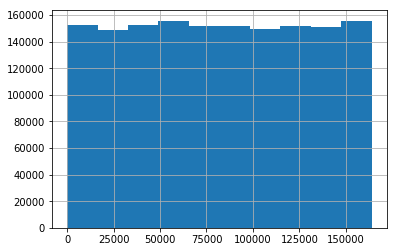

test


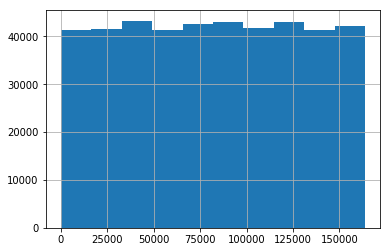

----- 交易卡號 - cano -----
train


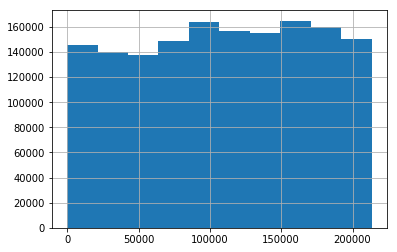

test


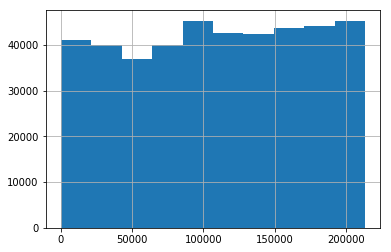

----- 特店代號 - mchno -----
train


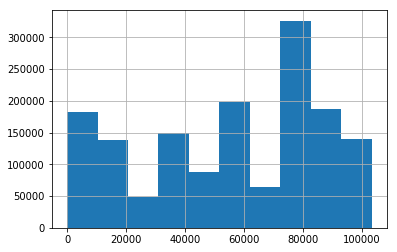

test


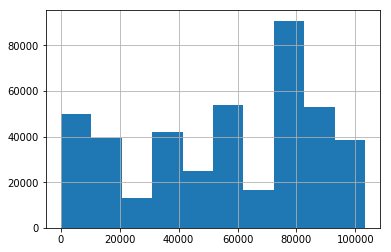

----- 收單行代碼 - acqic -----
train


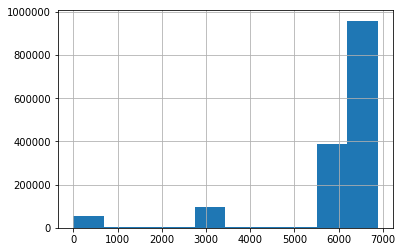

test


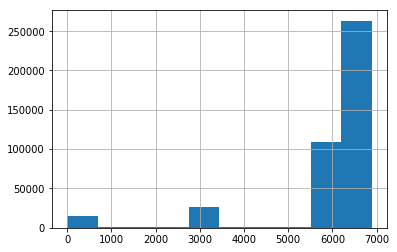

----- MCC_CODE - mcc -----
train


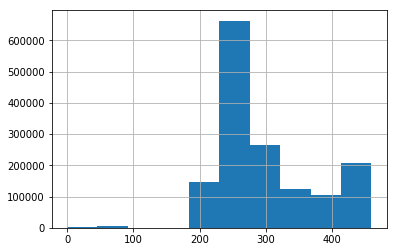

test


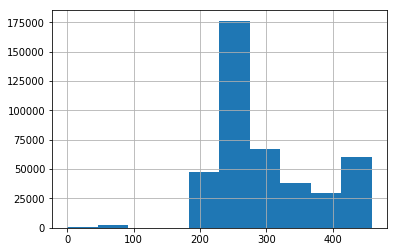

----- 交易型態 - etymd -----
train


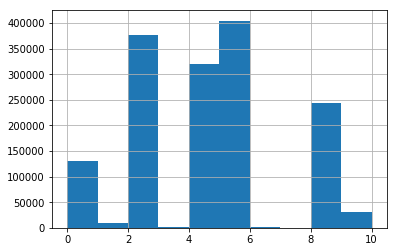

test


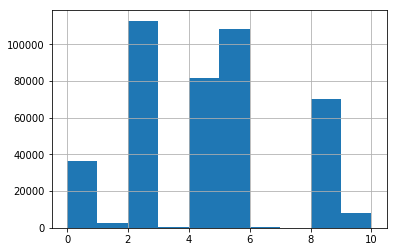

----- 消費地國別 - stocn -----
train


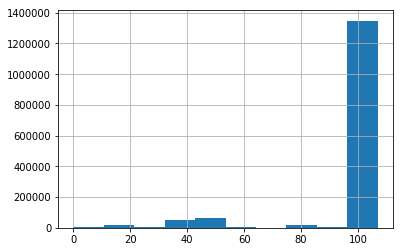

test


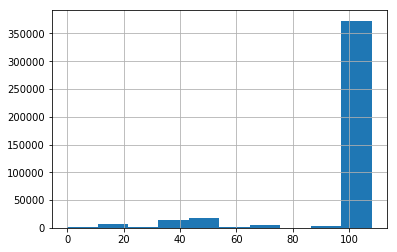

----- 消費城市 - scity -----
train


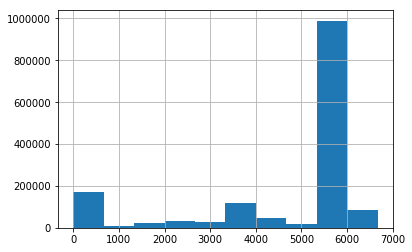

test


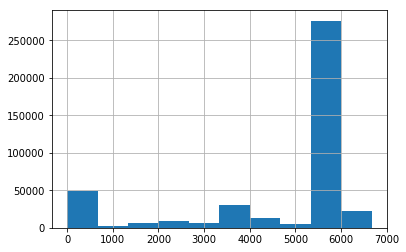

----- 消費地幣別 - csmcu -----
train


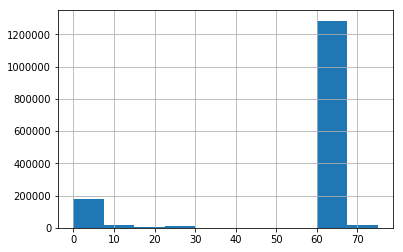

test


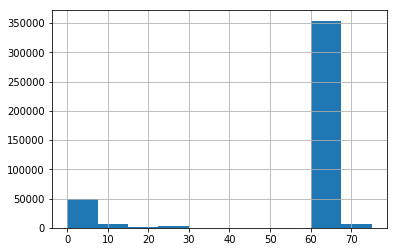

In [9]:
for cat in cat_colnames:
    
    if train_raw[cat].unique().shape[0] < 10:
        continue
    
    print("-----", cat_dict[cat], "-", cat, "-----")
    print("train")
    train_raw[cat].hist()
    plt.show()
    print("test")
    test_raw[cat].hist()
    plt.show()

#### 看一下各類別的盜刷差異

##### TODO: 一個帳號是否可擁有多個卡號?
##### TODO: 配合交易時間去看一個帳號或一個卡號目前為止的行為，例如累積消費多少金額、累積去過多少店
##### TODO: 可不可以藉由消費量去推假日平日
##### TODO: 1. 觀察短時間(時、分)內大量刷卡行為
##### TODO: 2. 某消費紀錄過去7天、14天的平均、最大值
##### TODO: 3. 某消費紀錄過去7天、14天"每天"的平均、最大值
##### TODO: 4. 某消費紀錄過去7天、14天的睡覺時間平均消費次數
##### TODO: 5. 某消費紀錄過去7天、14天的睡覺時間每日平均消費次數
##### TODO: 6. 某消費紀錄過去7天、14天的消費地點頻率
##### TODO: 7. 某消費紀錄過去7天、14天發生在不同消費地點的時間差
##### TODO: 8. 消費方式過去7天、14天的平均消費金額
##### TODO: 例如特店代號這種特徵，可以嘗試做做看mean encoding，代表是不是好發盜刷的特約商店
##### TODO: 每個帳號在每個國家/城市消費過的幣別種類數
##### TODO: 交易類別或交易型態不一定不重要，可試試看mean encoding?

In [8]:
for cat in cat_colnames:
    print(train_raw[[cat, "fraud_ind"]].groupby(cat).mean())

        fraud_ind
bacno            
1        0.000000
2        0.006329
3        0.000000
4        0.000000
7        0.038462
8        0.000000
9        0.000000
11       0.000000
15       0.000000
16       0.000000
17       0.000000
18       0.000000
20       0.000000
21       0.000000
23       0.000000
24       0.000000
26       0.000000
28       0.000000
29       0.000000
30       0.000000
33       0.666667
34       0.000000
35       0.125000
36       0.000000
37       0.000000
40       0.000000
41       0.200000
42       0.000000
47       0.000000
48       0.000000
...           ...
163838   0.000000
163840   0.000000
163842   0.000000
163843   0.000000
163844   0.000000
163846   0.000000
163847   0.000000
163848   0.000000
163849   0.000000
163850   0.000000
163851   0.000000
163852   0.000000
163854   1.000000
163855   0.000000
163856   0.000000
163858   0.000000
163860   0.000000
163861   0.000000
163862   0.000000
163864   0.052632
163867   0.000000
163870   0.000000
163874   0

       fraud_ind
ovrlt           
0       0.013133
1       0.031356
       fraud_ind
flbmk           
0       0.013345
1       0.017150
       fraud_ind
hcefg           
0       0.000389
1       0.000787
2       0.000000
3       0.000000
5       0.014241
6       0.015500
7       0.002237
8       0.000000
9       0.000000
       fraud_ind
csmcu           
0       0.001078
1       0.000000
2       0.000000
3       0.069767
4       0.330012
5       0.000000
6       0.000000
7       0.000000
9       0.000000
10      0.339525
11      0.000000
12      0.179487
13      0.010820
14      0.375000
15      0.000000
16      0.000000
17      0.000000
18      0.030303
19      0.000000
20      0.158885
21      0.023810
22      0.002849
23      0.229885
24      0.248619
25      0.100000
26      0.050594
27      0.000000
28      1.000000
29      0.009246
30      0.055249
...          ...
44      0.000000
45      0.003509
46      0.000000
47      0.062147
48      0.421053
49      0.043290
50      0.0340

In [12]:
print(train_raw[["locdt", "fraud_ind"]].groupby("locdt").mean())

       fraud_ind
locdt           
1       0.010771
2       0.013257
3       0.010781
4       0.009622
5       0.010702
6       0.012035
7       0.015410
8       0.011699
9       0.011249
10      0.009039
11      0.011818
12      0.011462
13      0.009136
14      0.011879
15      0.011163
16      0.012142
17      0.010482
18      0.015579
19      0.014567
20      0.012342
21      0.014059
22      0.014134
23      0.015178
24      0.013792
25      0.018648
26      0.015043
27      0.011451
28      0.016042
29      0.010120
30      0.013090
...          ...
61      0.013070
62      0.014697
63      0.013936
64      0.011957
65      0.009594
66      0.010885
67      0.008262
68      0.009381
69      0.010892
70      0.013648
71      0.010846
72      0.010807
73      0.008674
74      0.011129
75      0.009441
76      0.006295
77      0.008432
78      0.009455
79      0.011263
80      0.009917
81      0.006802
82      0.008397
83      0.008114
84      0.008822
85      0.010133
86      0.0097

In [32]:
train_raw.loc[train_raw["fraud_ind"].eq(1), "scity"].value_counts().unique().shape[0] # 539x1

68

In [35]:
(train_raw.loc[train_raw["fraud_ind"].eq(0), "scity"].value_counts() == 1).sum()  # 279 2206

2206

### TODO:看一下mchno

In [10]:
# 盜刷率百分百
# train_raw.loc[train_raw["mchno"].eq(103281)]  
train_raw.loc[train_raw["mchno"].eq(103289)]  
#train_raw.loc[train_raw["mchno"].eq(103294)] 

# train_raw.loc[train_raw["mchno"].eq(103304)]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
518498,5921,11793,127644,0.0,5,4,1,8,0,0,...,0,76,102913.0,250,103289,0,5664,6,0,764215
1476942,5921,106311,147820,0.0,5,4,1,8,0,0,...,0,83,114954.0,250,103289,0,5664,6,0,774223


In [13]:
train_raw.loc[train_raw["bacno"].eq(41) & train_raw["fraud_ind"].eq(1)]  # , "fraud_ind"

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
283298,6055,41,61182,2346.74,5,26,1,2,0,0,...,0,2,223732.0,203,43127,0,6368,92,0,1835188


In [18]:
train_raw.loc[train_raw["conam"].eq(1300.41), "fraud_ind"]

435615    0
872465    0
Name: fraud_ind, dtype: int64

In [17]:
train_raw.loc[train_raw["acqic"].eq(6055) & train_raw["fraud_ind"].eq(1)]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
211537,6055,154482,3798,1517.86,5,26,1,2,0,0,...,0,44,232808.0,203,43127,0,6368,92,2,1880458
283298,6055,41,61182,2346.74,5,26,1,2,0,0,...,0,2,223732.0,203,43127,0,6368,92,0,1835188
933968,6055,60363,105053,1608.34,5,26,1,2,0,0,...,0,28,152441.0,203,43127,0,6368,92,2,1862209
935782,6055,9315,105107,1057.77,5,26,1,2,0,0,...,0,32,200554.0,201,48758,0,5932,52,2,1866920


In [8]:
train_raw.loc[train_raw["bacno"].eq(9315), ['bacno', 'acqic']].groupby(['bacno', 'acqic']).size()

bacno  acqic
9315   6032     4
       6055     1
       6189     1
       6231     9
       6413     1
       6430     1
       6581     2
       6677     1
       6716     3
dtype: int64

In [9]:
train_raw.loc[train_raw["bacno"].eq(9315), "fraud_ind"]

100998     0
121126     0
163053     0
238203     0
271012     0
292578     0
398439     0
435876     0
487684     0
523569     0
569627     0
585440     0
614587     0
675351     0
755558     0
795060     0
857622     0
890060     0
935782     1
1172216    0
1291609    0
1299202    0
1360576    0
Name: fraud_ind, dtype: int64

In [18]:
train_raw.loc[train_raw["acqic"].eq(6055) & train_raw["fraud_ind"].eq(0)]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
24568,6055,155728,100636,1145.04,5,26,1,2,0,0,...,0,45,83002.0,201,48758,0,5932,52,0,1880704
65116,6055,161628,96024,1585.60,5,26,1,2,0,1,...,0,59,195620.0,201,48758,0,5932,52,0,1895936
70092,6055,147554,167590,1512.84,5,26,1,2,0,0,...,0,14,103134.0,52,102075,0,5932,52,0,1846873
130178,6055,19596,1878,1390.25,5,26,1,2,0,1,...,0,52,174544.0,201,48758,0,5932,52,0,1888717
149680,6055,146973,5245,1672.76,5,26,1,2,0,0,...,0,20,114621.0,201,48758,0,5932,52,0,1853338
177178,6055,8846,78956,1922.27,5,26,1,2,0,0,...,0,27,1952.0,201,48758,0,5932,52,0,1860600
202262,6055,130995,184716,1165.32,5,26,1,2,0,0,...,0,43,105536.0,201,48758,0,5932,52,0,1878639
221112,6055,87118,94379,1759.69,5,26,1,2,0,1,...,0,4,225754.0,201,54862,0,3501,52,0,1837223
266044,6055,29206,97480,1284.97,5,26,1,2,0,0,...,0,5,105053.0,201,48758,0,5932,52,0,1837575
285149,6055,38922,183849,1890.65,5,26,1,2,0,1,...,0,87,233335.0,201,54862,0,3501,52,0,1924480


In [6]:
train_raw[train_raw["mcc"].eq(25)]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
302409,5810,150662,83495,1651.40,5,71,1,8,0,0,...,0,90,60252.0,25,21920,1,5184,50,0,784549
852906,5810,150662,83495,1792.06,5,71,1,8,0,0,...,0,85,21848.0,25,21920,0,5184,50,0,776814
1492075,5810,126044,178534,1643.39,5,71,1,8,0,0,...,0,90,80630.0,25,21920,0,5184,50,0,784611


In [10]:
train_raw.loc[train_raw["mcc"].eq(16), ['fraud_ind', 'hcefg', 'insfg']]

,fraud_ind,hcefg,insfg
132891,0,5,0
199764,0,5,0
452206,0,5,0
461990,0,5,0
513911,0,5,0
582029,0,5,0
912034,0,5,0
1098982,0,6,0
1293952,0,5,0
1457271,0,5,0


In [8]:
train_raw[train_raw["mcc"].eq(16)]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
132891,3121,97166,116703,556.83,5,20,0,2,0,0,...,0,51,203224.0,16,43315,0,3258,42,0,725323
199764,3121,97166,60945,556.83,5,20,0,2,0,0,...,0,51,201448.0,16,43315,0,3258,42,0,725309
452206,3121,6315,109884,561.39,5,20,0,2,0,0,...,0,11,115632.0,16,43315,0,3258,42,0,657448
461990,3371,57349,193547,852.15,5,62,0,2,0,0,...,0,27,144119.0,16,103223,0,5820,102,0,684155
513911,6395,45217,39649,1249.58,5,20,0,2,0,0,...,0,74,84642.0,16,36020,0,3259,42,0,1911017
582029,2373,111681,66485,1714.70,5,20,0,2,0,0,...,0,74,84835.0,16,36020,0,3259,42,0,761217
912034,2373,111681,66485,1685.07,5,20,0,2,0,0,...,0,60,90209.0,16,36020,0,3259,42,0,738607
1098982,3371,131040,103174,2751.55,5,75,0,2,NaN,NaN,...,0,46,160636.0,16,103223,0,5820,102,0,716847
1293952,2373,111681,66485,1641.68,5,20,0,2,0,0,...,0,77,122838.0,16,36020,0,3259,42,0,766095
1457271,3271,109047,71672,594.67,5,62,0,2,0,0,...,0,38,103838.0,16,43316,0,5817,102,0,703940


In [19]:
train_raw[train_raw["bacno"].eq(97166) & train_raw["locdt"].eq(34)]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
7932,6767,97166,56378,792.96,5,62,0,4,0,0,...,0,34,152654.0,189,16614,0,5817,102,0,1710924
8386,5975,97166,116703,634.99,5,62,0,4,0,0,...,0,34,93851.0,263,91037,0,5817,102,0,1068233
16609,6716,97166,116703,782.52,5,62,1,8,0,0,...,0,34,144002.0,57,34227,0,5820,102,0,996560
27898,5975,97166,116703,387.24,5,62,0,4,0,0,...,0,34,212443.0,263,99231,0,5817,102,0,1282987
198243,6769,97166,116703,535.31,5,62,1,8,0,1,...,0,34,180228.0,373,79200,0,5817,102,0,427679
336777,5575,97166,116703,881.96,5,62,1,8,0,0,...,0,34,172514.0,203,33794,0,2138,44,0,697874
350436,6716,97166,116703,776.36,5,62,1,8,0,0,...,0,34,144712.0,57,34227,0,5820,102,0,1282790
672897,6716,97166,60945,559.31,5,62,0,4,0,0,...,0,34,182848.0,247,39562,0,3590,102,0,1568483
1102168,6716,97166,116703,782.52,5,62,1,8,0,0,...,0,34,144003.0,57,34227,0,5820,102,0,1354120
1170326,6716,97166,116703,776.36,5,62,1,8,0,0,...,0,34,144712.0,57,34227,0,5820,102,0,1354124


In [16]:
train_raw.loc[train_raw["bacno"].eq(97166) & train_raw["fraud_ind"].eq(1)]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
134310,3357,97166,60945,1.86,5,61,0,2,0,0,...,0,62,165455.0,367,55027,0,6576,46,0,742689
298075,3357,97166,60945,163.69,5,61,0,2,0,0,...,0,62,185702.0,367,55027,0,6576,46,0,742967
636142,3357,97166,60945,283.96,5,61,0,2,0,0,...,0,62,213526.0,367,55027,0,6576,46,0,743262
705934,3357,97166,60945,338.32,5,61,0,2,0,0,...,0,62,215443.0,367,55027,0,6576,46,0,743232
802541,3357,97166,60945,212.73,5,61,0,2,0,0,...,0,62,211552.0,367,55027,0,6576,46,0,743151
1014830,3357,97166,60945,478.71,5,61,0,2,0,0,...,0,62,223150.0,367,55027,0,6576,46,0,743390
1021062,3357,97166,60945,101.39,5,61,1,8,0,0,...,0,62,165313.0,367,55027,0,874,46,0,742682
1116001,3357,97166,60945,212.73,5,61,0,2,0,0,...,0,62,202204.0,367,55027,0,6576,46,0,743115
1238448,3357,97166,60945,402.76,5,61,0,2,0,0,...,0,62,221352.0,367,55027,0,6576,46,0,743336
1252336,3357,97166,60945,484.93,5,61,0,2,0,0,...,0,62,225408.0,367,55027,0,6576,46,2,743368


In [5]:
train_raw.loc[train_raw["bacno"].eq(97166) & train_raw["locdt"].eq(62)]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
134310,3357,97166,60945,1.86,5,61,N,2,N,N,...,0,62,165455.0,367,55027,N,6576,46,0,742689
298075,3357,97166,60945,163.69,5,61,N,2,N,N,...,0,62,185702.0,367,55027,N,6576,46,0,742967
519034,6716,97166,116703,633.76,5,62,Y,8,N,Y,...,0,62,180106.0,275,46153,N,4526,102,0,1156813
532752,6777,97166,56378,755.52,5,62,N,4,N,N,...,0,62,60512.0,263,6044,N,4907,102,0,1727512
636142,3357,97166,60945,283.96,5,61,N,2,N,N,...,0,62,213526.0,367,55027,N,6576,46,0,743262
705934,3357,97166,60945,338.32,5,61,N,2,N,N,...,0,62,215443.0,367,55027,N,6576,46,0,743232
802541,3357,97166,60945,212.73,5,61,N,2,N,N,...,0,62,211552.0,367,55027,N,6576,46,0,743151
1014830,3357,97166,60945,478.71,5,61,N,2,N,N,...,0,62,223150.0,367,55027,N,6576,46,0,743390
1021062,3357,97166,60945,101.39,5,61,Y,8,N,N,...,0,62,165313.0,367,55027,N,874,46,0,742682
1116001,3357,97166,60945,212.73,5,61,N,2,N,N,...,0,62,202204.0,367,55027,N,6576,46,0,743115


In [9]:
print(train_raw[["bacno", "fraud_ind"]].groupby("bacno").mean())
print(train_raw["bacno"].value_counts())

        fraud_ind
bacno            
1        0.000000
2        0.006329
3        0.000000
4        0.000000
7        0.038462
8        0.000000
9        0.000000
11       0.000000
15       0.000000
16       0.000000
17       0.000000
18       0.000000
20       0.000000
21       0.000000
23       0.000000
24       0.000000
26       0.000000
28       0.000000
29       0.000000
30       0.000000
33       0.666667
34       0.000000
35       0.125000
36       0.000000
37       0.000000
40       0.000000
41       0.200000
42       0.000000
47       0.000000
48       0.000000
...           ...
163838   0.000000
163840   0.000000
163842   0.000000
163843   0.000000
163844   0.000000
163846   0.000000
163847   0.000000
163848   0.000000
163849   0.000000
163850   0.000000
163851   0.000000
163852   0.000000
163854   1.000000
163855   0.000000
163856   0.000000
163858   0.000000
163860   0.000000
163861   0.000000
163862   0.000000
163864   0.052632
163867   0.000000
163870   0.000000
163874   0

In [11]:
size_df = train_raw[["bacno", "fraud_ind"]].groupby("bacno").count()
mean_df = train_raw[["bacno", "fraud_ind"]].groupby("bacno").mean()
# size_df
df = pd.merge(size_df, mean_df, left_index=True, right_index=True, how='left')
# df[df["fraud_ind_y"] > 0]

,fraud_ind_x,fraud_ind_y
bacno,,
2,158,0.006329
7,26,0.038462
33,3,0.666667
35,16,0.125000
41,5,0.200000
73,6,0.166667
75,25,0.520000
80,14,0.071429
83,30,0.033333


#### 同樣數字不同金額一個盜刷一個沒有????

In [15]:
train_raw.loc[train_raw["bacno"].eq(163605), "fraud_ind"]
train_raw[train_raw["bacno"].eq(163605)]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
26263,6296,163605,37606,479.64,5,61,1,2,0,0,...,0,46,130.0,337,10975,0,5320,104,2,1881658
86833,6296,163605,37606,479.64,5,61,1,2,0,0,...,0,46,711.0,337,10975,0,5320,104,2,1881669
357228,6032,163605,37606,1641.04,5,62,1,2,0,0,...,1,13,233351.0,203,77859,0,5817,102,0,134418
692092,6386,163605,186535,1094.79,5,62,1,2,0,1,...,0,11,223804.0,201,43929,0,5491,102,0,1844231
1327852,6032,163605,37606,876.08,6,62,0,2,0,0,...,0,33,142934.0,203,77859,0,5817,102,0,59590
1367866,6032,163605,37606,876.08,5,62,1,2,0,0,...,0,25,428.0,203,77859,0,5817,102,0,454186


In [10]:
train_raw.loc[train_raw["bacno"].eq(35), "fraud_ind"]
train_raw[train_raw["bacno"].eq(35)]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
20196,6716,35,99027,665.75,5,62,1,8,0,0,...,0,38,21236.0,248,34239,0,5820,102,0,1213465
47805,3221,35,99027,943.99,5,61,1,8,0,0,...,0,64,220526.0,288,55807,0,6580,104,0,746791
112725,6769,35,99027,532.80,5,62,1,8,0,0,...,0,65,201640.0,247,82174,0,5817,102,0,233512
289798,6769,35,99027,542.29,5,62,1,8,0,0,...,0,61,92409.0,247,82174,0,5817,102,0,232380
306751,3221,35,99027,952.56,5,61,1,8,0,0,...,0,76,44043.0,288,55807,0,6580,104,2,763983
404277,6769,35,99027,547.93,5,62,1,8,0,0,...,0,12,140607.0,247,82174,0,5817,102,0,364118
428568,3221,35,99027,944.96,5,61,1,8,0,0,...,0,65,233607.0,288,55807,0,6580,104,2,748632
711079,6769,35,99027,526.88,5,62,1,8,0,0,...,0,3,164848.0,247,82174,0,5817,102,0,362061
730454,6769,35,99027,564.28,5,62,1,8,0,0,...,0,11,11723.0,247,82174,0,5817,102,0,392664
743495,5666,35,99027,2123.56,5,62,0,2,0,0,...,0,41,162336.0,343,53952,0,5817,102,0,709055


#### 網路交易註記 ecfg

In [11]:
print(train_raw.loc[train_raw["ecfg"].eq(0), "fraud_ind"].mean())
print(train_raw.loc[train_raw["ecfg"].eq(1), "fraud_ind"].mean())

0.0025226705402851624
0.04516945323090827


#### 交易類別 contp

In [12]:
print(train_raw[["contp", "fraud_ind"]].groupby("contp").mean())
print(train_raw["contp"].value_counts())

       fraud_ind
contp           
0       0.000000
1       0.000000
2       0.000121
3       0.006518
4       0.011106
5       0.014274
6       0.000221
5    1369806
4      69965
2      66147
6      13593
3       2148
1         84
0         44
Name: contp, dtype: int64


#### 交易型態 etymd

In [13]:
print(train_raw[["etymd", "fraud_ind"]].groupby("etymd").mean())
print(train_raw["etymd"].value_counts())

       fraud_ind
etymd           
0       0.001407
1       0.002225
2       0.020664
3       0.007234
4       0.000546
5       0.000502
6       0.073306
7       0.293860
8       0.047411
9       0.005652
10      0.000000
5     404611
2     377669
4     320502
8     243995
0     130022
9      30076
1      10339
3       2350
6       1978
7        228
10        17
Name: etymd, dtype: int64


#### 消費國別

In [8]:
print(train_raw[["stscd", "fraud_ind"]].groupby("stscd").mean())
print(train_raw["stscd"].value_counts())
print(test_raw["stscd"].value_counts())

       fraud_ind
stscd           
0       0.009768
1       0.061275
2       0.305360
3       0.000000
4       0.000000
0    1502745
2      18506
1        408
3        108
4         20
Name: stscd, dtype: int64
0    416461
2      5000
1       167
3        33
4         4
Name: stscd, dtype: int64


#### 特店代號 mchno

In [14]:
train_raw[["mchno", "fraud_ind"]].groupby("mchno").mean()

,fraud_ind
mchno,
0,0.000341
1,0.000000
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
8,0.000000
9,0.000000


#### 分期註記

In [10]:
train_raw[["insfg", "iterm"]].groupby("insfg", as_index=False).size()

insfg
0    1479475
1      42312
dtype: int64

In [21]:
size_df = train_raw[["insfg", "fraud_ind"]].groupby("insfg").count()
mean_df = train_raw[["insfg", "fraud_ind"]].groupby("insfg").mean()
# size_df
pd.merge(size_df, mean_df, left_index=True, right_index=True, how='left')

,fraud_ind_x,fraud_ind_y
insfg,,
0,1479475,0.013733
1,42312,0.000874


#### 收單行代碼 acqic

In [20]:
size_df = train_raw[["acqic", "fraud_ind"]].groupby("acqic").count()
mean_df = train_raw[["acqic", "fraud_ind"]].groupby("acqic").mean()
# size_df
pd.merge(size_df, mean_df, left_index=True, right_index=True, how='left')

,fraud_ind_x,fraud_ind_y
acqic,,
0,47940,0.000229
1,10,0.000000
2,3,0.000000
3,5,0.000000
4,1,0.000000
5,3,0.000000
6,1,0.000000
7,7,0.000000
8,27,0.000000


In [25]:
train_raw.loc[train_raw['acqic'].eq(6875)]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
382964,6875,128112,159044,102.16,5,62,1,8,0,0,...,0,42,203048.0,210,39550,0,0,46,0,1644204
450368,6875,86817,75210,1017.74,5,62,1,8,0,0,...,0,79,123122.0,210,39549,0,0,46,0,1381554
666356,6875,128112,159044,1609.10,5,62,1,8,0,0,...,0,73,205818.0,210,39550,0,0,46,0,1092461
1433187,6875,22314,171478,404.12,5,62,1,8,0,0,...,0,52,104746.0,210,39549,0,0,46,0,1507256


In [35]:
train_pre_columns = train_pre.columns.values.tolist()

In [42]:
train_pre.loc[train_pre['acqic'].eq(6875), train_pre_columns[80:]]

,latent_13,latent_14,latent_15,latent_16,bacon_cano_cnt,bacno_cano_conam_cumsum_mean,bacno_cano_14_rolling_times_prime_time_fraud_cnt,bacno_cano_sec_diff_latter,bacno_cano_no_recent_7_conam_pos_trend,bacno_cano_conam_rolling_7_window_sum,bacno_cano_conam_rolling_3_window_mean,bacno_cano_7_times_conam_max_by_no,bacno_cano_conam_rolling_14_window_max,bacno_cano_14_times_conam_max_by_no,bacno_cano_recent_no_5_loctm_acc_min_diff,bacno_cano_no_mean_loctm_acc_min_diff,fraud_ind
382568,0.297,0.0,0.419,0.0,76,465.620,0.0,3021244.0,0.000,931.24,465.620,1609.10,465.62,1609.10,50354.066667,1367.819778,0
449839,0.297,0.0,0.419,0.0,44,664.192,8.0,454913.0,-32.850,4569.79,650.857,1595.04,755.52,1595.04,4660.346667,2566.918605,1
665299,0.297,0.0,0.419,0.0,76,825.230,1.0,0.0,0.000,825.23,825.230,1609.10,825.23,1609.10,0.000000,1367.819778,1
1428824,0.297,0.0,0.419,0.0,34,668.226,5.0,73301.0,-93.046,3341.13,533.740,1024.29,1016.34,1024.29,585.108333,3835.137879,0


#### MCC_CODE mcc

In [43]:
size_df = train_raw[["mcc", "fraud_ind"]].groupby("mcc").count()
mean_df = train_raw[["mcc", "fraud_ind"]].groupby("mcc").mean()
# size_df
pd.merge(size_df, mean_df, left_index=True, right_index=True, how='left')

,fraud_ind_x,fraud_ind_y
mcc,,
0,7,0.000000
1,1,0.000000
2,74,0.000000
3,106,0.000000
4,2,0.000000
5,129,0.077519
6,2,0.000000
7,4,0.000000
9,13,0.000000


In [17]:
for colname, meaning in cat_dict.items():
    mask = np.isin(train_raw[colname].values,  test_raw[colname].unique())  # test的資料是否在train裡
    print("-" * 10 + meaning + "-" * 10)
    print("train裡有test也有的筆數:", mask.sum())
    print("test set有的唯一筆數:", test_raw[colname].unique().shape[0])
    print("train set有的唯一筆數:", train_raw[colname].unique().shape[0])
    print("test有但train沒有的唯一level筆數:", test_raw[colname].unique().shape[0] - train_raw[colname][mask].unique().shape[0])
    print("train有但test沒有的筆數:", np.sum(~mask))
    print("-" * 30)

----------歸戶帳號----------
train裡有test也有的筆數: 65031
test set有的唯一筆數: 71099
train set有的唯一筆數: 95214
test有但train沒有的唯一level筆數: 67971
train有但test沒有的筆數: 1456756
------------------------------
----------交易卡號----------
train裡有test也有的筆數: 58455
test set有的唯一筆數: 86808
train set有的唯一筆數: 129413
test有但train沒有的唯一level筆數: 83045
train有但test沒有的筆數: 1463332
------------------------------
----------特店代號----------
train裡有test也有的筆數: 1377751
test set有的唯一筆數: 45501
train set有的唯一筆數: 89316
test有但train沒有的唯一level筆數: 13467
train有但test沒有的筆數: 144036
------------------------------
----------交易類別----------
train裡有test也有的筆數: 1521787
test set有的唯一筆數: 7
train set有的唯一筆數: 7
test有但train沒有的唯一level筆數: 0
train有但test沒有的筆數: 0
------------------------------
----------交易型態----------
train裡有test也有的筆數: 1521787
test set有的唯一筆數: 11
train set有的唯一筆數: 11
test有但train沒有的唯一level筆數: 0
train有但test沒有的筆數: 0
------------------------------
----------收單行代碼----------
train裡有test也有的筆數: 1510405
test set有的唯一筆數: 3748
train set有的唯一筆數: 6051
test有但train沒有的唯一level筆數

#### 偷看一下train model出來重要度比較低的特徵，就可以不要理他

In [18]:
['hcefg', 
 'loctm_cnt_mean_by_ecfg', 'loctm_cnt_mean_by_flbmk', 'loctm_mean_by_insfg', 
 'loctm_cnt_mean_by_flg_3dsmk', 'loctm_mean_by_flbmk', 'loctm_cnt_mean_by_hcefg', 'loctm_mean_by_ecfg', 
 'loctm_cnt_mean_by_ovrlt', 'loctm_cnt_mean_by_stscd', 
 'contp', 
 'loctm_cnt_mean_by_insfg', 'conam_mean_by_insfg', 
 'loctm_mean_by_flg_3dsmk', 'conam_mean_by_flbmk', 'loctm_mean_by_ovrlt', 'loctm_mean_by_contp', 
 'conam_mean_by_hcefg', 'loctm_mean_by_hcefg', 'conam_mean_by_ecfg', 'conam_mean_by_contp', 'conam_mean_by_ovrlt',
 'conam_mean_by_flg_3dsmk', 'loctm_mean_by_stscd', 
 'iterm', 'ecfg', 'etymd', 'flbmk', 
 'loctm_cnt_mean_by_etymd', 
 'insfg', 
 'contp_etymd','loctm_mean_by_stocn']

['hcefg',
 'loctm_cnt_mean_by_ecfg',
 'loctm_cnt_mean_by_flbmk',
 'loctm_mean_by_insfg',
 'loctm_cnt_mean_by_flg_3dsmk',
 'loctm_mean_by_flbmk',
 'loctm_cnt_mean_by_hcefg',
 'loctm_mean_by_ecfg',
 'loctm_cnt_mean_by_ovrlt',
 'loctm_cnt_mean_by_stscd',
 'contp',
 'loctm_cnt_mean_by_insfg',
 'conam_mean_by_insfg',
 'loctm_mean_by_flg_3dsmk',
 'conam_mean_by_flbmk',
 'loctm_mean_by_ovrlt',
 'loctm_mean_by_contp',
 'conam_mean_by_hcefg',
 'loctm_mean_by_hcefg',
 'conam_mean_by_ecfg',
 'conam_mean_by_contp',
 'conam_mean_by_ovrlt',
 'conam_mean_by_flg_3dsmk',
 'loctm_mean_by_stscd',
 'iterm',
 'ecfg',
 'etymd',
 'flbmk',
 'loctm_cnt_mean_by_etymd',
 'insfg',
 'contp_etymd',
 'loctm_mean_by_stocn']

#### 刪除那些train有出現但test沒有出現的row(後來都不刪)

In [19]:
# deleted_row_no = []
# for colname, meaning in cat_dict.items():
#     if meaning not in ["歸戶帳號", "交易卡號"]: # and colname not in ["hcefg", "contp", "etymd", "ecfg", "flbmk", "insfg"]:
#         mask = np.isin(train_raw[colname].values, test_raw[colname].unique())
#         if not np.where(~mask)[0].shape[0] == 0:
#             print("-" * 10 + meaning + "-" * 10)
#             deleted_row_no.extend(np.where(~mask)[0].tolist())
# deleted_row_no = list(sorted(set(deleted_row_no)))

In [9]:
train_raw.loc[deleted_row_no, "fraud_ind"].sum()  ## 刪除的人裡面也會有盜刷的 -> think

NameError: name 'deleted_row_no' is not defined

In [ ]:
2649 / len(deleted_row_no) ## 約1.5%盜刷率

#### locdt 交易日期 -> 看一下有沒有pattern

In [ ]:
train_raw["locdt"].value_counts().reset_index(drop=True).plot()
test_raw["locdt"].value_counts().reset_index(drop=True).plot()

In [ ]:
test_raw["locdt"].value_counts().hist()
plt.show()
train_raw["locdt"].value_counts().hist()
plt.show()

### 資料合併準備做特徵

In [6]:
# 試試看round金額
train_raw["conam"] = train_raw["conam"].round()
test_raw["conam"] = test_raw["conam"].round()

In [10]:
train_raw.columns

Index(['acqic', 'bacno', 'cano', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
       'flbmk', 'flg_3dsmk', 'fraud_ind', 'hcefg', 'insfg', 'iterm', 'locdt',
       'loctm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd', 'txkey'],
      dtype='object')

In [11]:
# 'bacno', 'cano', 'txkey', 'locdt', 'loctm',
train_drop_d = train_raw.sort_values("fraud_ind").drop_duplicates(subset=['bacno', 'cano', 'acqic', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
                 'fraud_ind', 'hcefg', 'insfg', 'iterm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd', 'locdt'], keep="last")

In [12]:
train_drop_d.shape

(1470838, 23)

In [13]:
# 不刪除歸戶帳號、交易卡號
# train_raw.drop(deleted_row_no, axis=0, inplace=True)
# train_raw = train_raw.reset_index(drop=True)
# train_raw = train_raw.drop(["txkey"], axis=1) # , "bacno", "cano"

# 去除重複列
print("origin", train_raw.shape)
# train_raw = train_raw.drop_duplicates(subset=train_raw.columns[~train_raw.columns.isin(['txkey'])]).reset_index(drop=True)
# train_raw = train_raw.drop_duplicates(subset=["bacno", "cano", "stocn", "locdt", "loctm", "conam"], keep="last").reset_index(drop=True)
train_raw = train_raw.sort_values("fraud_ind").drop_duplicates(subset=['bacno', 'cano', 'acqic', 'conam', 'contp', 'csmcu', 'ecfg', 'etymd',
                 'fraud_ind', 'hcefg', 'insfg', 'iterm', 'mcc', 'mchno', 'ovrlt', 'scity', 'stocn', 'stscd', 'locdt'], keep="last")


print("drop_dup", train_raw.shape)

# 資料合併
y = train_raw["fraud_ind"]
X = train_raw.drop(["fraud_ind"], axis=1)

# test_raw = test_raw.drop(["txkey"], axis=1) # , "bacno", "cano"

all_features = pd.concat([X, test_raw], axis=0)
all_features.head()

origin (1521787, 23)
drop_dup (1470838, 23)


,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
1011191,5975,160800,155123,490.19,5,62,1,8,0,1,...,0,29,235018.0,191,90005,0,5817,102,0,1065617
1011190,5975,97584,55835,1.38,5,62,1,8,0,0,...,0,86,85800.0,207,90087,0,5817,102,0,1814145
1011189,6777,1884,116943,683.25,5,62,0,5,0,0,...,0,85,195601.0,294,1350,0,5817,102,0,1028226
1011188,6881,150173,105171,513.80,5,0,0,0,0,0,...,0,29,202338.0,457,86584,0,0,102,0,510958
1011187,0,19942,118919,465.62,5,0,0,2,0,0,...,0,80,100305.0,451,0,0,5817,102,0,38321


#### (特徵) 時間變數

In [14]:
all_features["loctm"] = all_features["loctm"].astype(str).str.rjust(8, fillchar="0")
# all_features["loctm"] = all_features["loctm"].str[:6]
all_features["loctm"]

1011191    235018.0
1011190    085800.0
1011189    195601.0
1011188    202338.0
1011187    100305.0
1011186    222456.0
1011185    144019.0
1011183    172948.0
1011182    120853.0
1011181    155002.0
1011180    202812.0
1011179    191217.0
1011178    153536.0
1011177    194533.0
1011176    124044.0
1011175    155121.0
1011174    153621.0
1011173    115241.0
1011192    100137.0
1011172    062200.0
1011193    171529.0
1011196    133652.0
1011215    070709.0
1011214    153630.0
1011213    185841.0
1011212    133937.0
1011211    092425.0
1011210    163652.0
1011209    083722.0
1011208    143737.0
             ...   
421635     091728.0
421636     113517.0
421637     093436.0
421638     113400.0
421639     100959.0
421640     113827.0
421641     093535.0
421642     183149.0
421643     072503.0
421644     003151.0
421645     021542.0
421646     120925.0
421647     073249.0
421648     123322.0
421649     175847.0
421650     081612.0
421651     211823.0
421652     101026.0
421653     104828.0


In [15]:
all_features["loctm"] = all_features["loctm"].astype(str).str.rjust(8, fillchar="0")
all_features["loctm"] = all_features["loctm"].str[:6]

all_features["loctm_hour"] = all_features["loctm"].str[:2].astype(int)
all_features["loctm_min"] = all_features["loctm"].str[2:4].astype(int)
all_features["loctm_sec"] = all_features["loctm"].str[4:].astype(int)
all_features["loctm"] = all_features["loctm"].astype(int)

#### 先把key值留下來，先加No欄進去再merge回來

In [16]:
# 先記好順序
key_data = pd.DataFrame(all_features["txkey"])
key_data.head(3)

,txkey
1011191,1065617
1011190,1814145
1011189,1028226


In [17]:
all_features.sort_values(["locdt", "loctm"])

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,mcc,mchno,ovrlt,scity,stocn,stscd,txkey,loctm_hour,loctm_min,loctm_sec
498036,6716,12765,101514,966.58,4,62,0,2,0,0,...,247,34949,0,5817,102,0,1119159,0,0,29
900910,5575,34837,60869,1071.10,5,62,1,8,0,0,...,203,33794,0,2138,44,0,641444,0,0,40
1429123,6769,22630,110573,438.21,5,62,0,5,0,0,...,251,79257,0,3588,102,0,188670,0,0,45
739925,6767,91588,208961,1174.17,5,62,0,5,0,0,...,293,14765,0,5817,102,0,1475737,0,0,48
434529,3198,84148,180103,367.29,5,60,0,5,0,0,...,251,68966,0,3982,38,0,641443,0,0,51
546012,6697,106072,104134,1397.12,5,62,1,2,0,1,...,201,39422,0,1852,98,0,1832976,0,1,2
402754,3348,84117,186292,453.88,5,62,1,8,0,0,...,380,54238,0,6580,38,0,641445,0,1,26
201756,6769,158361,77445,563.14,5,62,1,8,0,1,...,373,79200,0,5817,102,0,188671,0,1,35
233707,6881,19271,90392,513.80,5,0,0,0,0,0,...,457,59369,0,0,102,0,476972,0,1,56
214618,6189,90546,117528,796.90,5,62,1,2,0,1,...,296,90017,0,3588,102,0,1119160,0,1,59


#### (特徵) 排序locdt, loctm後放入no欄當作順序並將時間換算成總秒數 (後面要刪)

In [18]:
# 首先先排序
all_features = all_features.sort_values(["locdt", "loctm"])
all_features.head()
# 加入No欄
all_features["no"] = range(all_features.shape[0])

# 每一天換算成累積秒數
all_features["total_acc_sec"] = all_features["locdt"] * 24 * 60 * 60 + all_features["loctm_hour"] * 60 * 60 + \
                                all_features["loctm_min"] * 60 + all_features["loctm_sec"]
all_features["total_acc_min"] = all_features["total_acc_sec"] / 60
all_features["total_acc_hour"] = all_features["total_acc_min"] / 60

In [19]:
all_features.shape

(1892503, 29)

#### 先刪除歸戶帳號、交易卡號和交易序號(key)，因為不match太多 (後來都加回來了)

In [ ]:
# all_features.drop(["bacno", "cano", "txkey"], axis=1, inplace=True)
# all_features.shape

#### (特徵) Fallback 註記 與  3DS 交易註記 有missing值 (全部出現在testing set -> 先以補0處理)
- Fallback註記: IC晶片卡於IC端末機之交易卻非以讀晶片的方式完成交易而是改用傳統刷磁條的方式完成交易，IC卡於IC端末機之交易端末機會要求以讀晶片方式完成交易，但在晶片毀損禍端末機無法讀取晶片的狀況下會變成改刷磁條，此種交易稱為FALLBACK。其特點在於有中介機構審查授權情形，以目前信用卡交易頻繁，實難能進行此種交易方式，故僅於線傳有困難，或是異常或重大交易，始使用此種方式。

In [20]:
# flbmk, flg_3dsmk
print("-" * 10 + "test_set" + "-" * 10)
print(test_raw.isnull().sum())
print("-" * 10 + "train_set" + "-" * 10)
print(train_raw.isnull().sum())

# all_features[all_features["flbmk"].isnull()]
# 僅有6000多筆有註記Y
print(all_features["flbmk"].value_counts())

# print(train_raw[["flbmk", "fraud_ind"]].groupby("flbmk").sum())
# print(train_raw[["flg_3dsmk", "fraud_ind"]].groupby("flg_3dsmk").sum())

# flbmk & flg_3dsmk missing的消費幣別都是75，反之亦然
print(test_raw.loc[test_raw["csmcu"].eq(75)].head(3))

# train set消費幣別為75的消費紀錄，flbmk & flg_3dsmk也都是空白
print(train_raw.loc[train_raw["csmcu"].eq(75)].head(3))

----------test_set----------
acqic           0
bacno           0
cano            0
conam           0
contp           0
csmcu           0
ecfg            0
etymd           0
flbmk        3715
flg_3dsmk    3715
hcefg           0
insfg           0
iterm           0
locdt           0
loctm           0
mcc             0
mchno           0
ovrlt           0
scity           0
stocn           0
stscd           0
txkey           0
dtype: int64
----------train_set----------
acqic            0
bacno            0
cano             0
conam            0
contp            0
csmcu            0
ecfg             0
etymd            0
flbmk        11139
flg_3dsmk    11139
fraud_ind        0
hcefg            0
insfg            0
iterm            0
locdt            0
loctm            0
mcc              0
mchno            0
ovrlt            0
scity            0
stocn            0
stscd            0
txkey            0
dtype: int64
0    1871273
1       6376
Name: flbmk, dtype: int64
     acqic   bacno   cano   co

In [22]:
test_raw[test_raw["flbmk"].isnull()]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
59,6881,156567,21219,513.80,5,75,0,0,NaN,NaN,...,0,115,31130.0,457,59333,0,0,102,0,603882
227,6871,105043,797,288.18,5,75,0,2,NaN,NaN,...,0,95,183319.0,192,57451,0,1803,75,0,1462313
228,6871,105043,797,245.75,5,75,0,2,NaN,NaN,...,0,98,224425.0,192,57451,0,1803,75,0,1392455
229,6871,105043,797,292.51,5,75,0,2,NaN,NaN,...,0,95,184348.0,192,57451,0,1803,75,0,1033797
927,6032,150861,145644,637.74,5,75,1,2,NaN,NaN,...,0,99,185200.0,381,81989,0,5817,102,0,269885
1100,6032,86752,156615,1.38,5,75,1,2,NaN,NaN,...,0,114,2510.0,210,84937,0,5817,102,0,157994
1457,6769,147829,123728,1485.11,5,75,1,8,NaN,NaN,...,0,100,51246.0,373,80263,1,5817,102,0,385630
1591,6769,93251,140063,1.38,5,75,1,8,NaN,NaN,...,0,94,90327.0,373,79246,0,5817,102,0,154002
1949,6182,121621,174059,1.38,5,75,1,2,NaN,NaN,...,0,97,170212.0,296,73998,0,3426,42,0,1933794
2197,6760,82289,110071,852.29,5,75,1,2,NaN,NaN,...,0,106,195026.0,296,66694,0,3323,27,0,1941801


In [23]:
# 先補0，TODO: 研究這是怎麼回事
all_features["flbmk"] = all_features["flbmk"].fillna(0)
all_features["flg_3dsmk"] = all_features["flg_3dsmk"].fillna(0)
all_features[all_features['csmcu'].eq(75)].head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,stocn,stscd,txkey,loctm_hour,loctm_min,loctm_sec,no,total_acc_sec,total_acc_min,total_acc_hour
1519580,6769,36308,199769,1.38,5,75,1,8,0,0,...,102,0,159745,0,5,43,47,86743,1445.716667,24.095278
1520231,6881,153435,203605,513.80,5,75,0,0,0,0,...,102,0,476971,0,5,45,48,86745,1445.750000,24.095833
1519035,6881,139728,168027,513.80,5,75,0,0,0,0,...,102,0,476973,0,7,10,54,86830,1447.166667,24.119444


#### 盜刷的金額分布，有0然後有盜刷
去看每天每小時某個帳戶消費金額是0的count數對上盜刷總和，看起來有關係

In [25]:
print(train_raw[["fraud_ind", "conam"]].groupby("fraud_ind").min()) ## 盜刷但交易金額是0
print("交易金額是0的交易紀錄筆數:", train_raw.loc[train_raw["conam"] == 0].shape[0])
print("交易金額是0的盜刷筆數:", train_raw.loc[train_raw["conam"] == 0, "fraud_ind"].sum())

           conam
fraud_ind       
0            0.0
1            0.0
交易金額是0的交易紀錄筆數: 46243
交易金額是0的盜刷筆數: 2569


In [19]:
# 偷加loctm_hour進去train_raw
train_raw["loctm"] = train_raw["loctm"].astype(str).str.rjust(8, fillchar="0")
train_raw["loctm"] = train_raw["loctm"].str[:6]

train_raw["loctm_hour"] = train_raw["loctm"].str[:2].astype(int)

# 去看每天每小時某個帳戶消費金額是0的count數對上盜刷總和，看起來有關係
canam_is_0 = train_raw.loc[train_raw["conam"] == 0]
canam_is_0[["locdt", "loctm_hour", "bacno", "fraud_ind"]].\
groupby(["locdt", "loctm_hour", "bacno"]).\
agg({"fraud_ind": ['count', 'sum']})["fraud_ind"].sort_values("count", ascending=False)

count  sum
locdt loctm_hour bacno             
51    16         159077     23    0
      8          51543      21    0
83    20         147672     18    0
9     0          26172      17    0
36    17         89925      15    0
33    4          29951      15    4
59    18         34792      13    0
33    3          19924      13    1
37    7          148952     12    5
34    4          59157      12    2
33    3          22953      12    3
47    1          135498     12    0
12    17         151168     12    0
34    5          73199      11    3
1     20         67402      11    0
28    10         134985     11    0
52    21         56713      11    0
66    1          132686     11    0
48    21         149740     11    0
34    4          34231      11    3
15    9          114963     11    0
38    19         146996     11    0
33    2          156870     10   10
32    5          104965     10    4
23    4          117275     10    0
34    4          988        10    1
13    13         135498     10    0
39    14         114131     10    1
51    9          51543       9    0
49    11         155855      9    0
...                        ...  ...
32    20         75377       1    0
                 74513       1    0
                 73697       1    0
                 72189       1    0
                 69926       1    0
                 67866       1    0
                 58697       1    0
                 58266       1    0
                 56799       1    0
                 47381       1    0
                 44340       1    0
                 41811       1    0
                 41032       1    0
                 13186       1    0
      19         82942       1    0
                 153747      1    0
                 146210      1    0
                 144157      1    0
                 141310      1    0
                 140601      1    0
                 140327      1    0
                 126053      1    0
                 125365      1    0
                 120940      1    0
                 120425      1    0
                 107967      1    0
                 103090      1    0
                 96384       1    0
                 87662       1    0
90    23         139705      1    0

[38105 rows x 2 columns]

### Numeric columns
- locdt 授權日期 -> 看一下有沒有pattern
- loctm 授權時間
- conam 交易金額-台幣(經過轉換)
- iterm 分期期數

loctm格式為時分秒，
若時間為下午三點十分零秒，
則會顯示151000.0 --> 時間變數(時間點)

#### (特徵) 消費金額是否為0
有這個特徵就可以去看每筆消費前，每帳戶每日每小時的刷卡紀錄0出現的次數

In [24]:
all_features["conam_is_0"] = (all_features["conam"] == 0).astype(int)

#### (特徵) groupby acqic收單行代碼&交易金額(不同交易金額代表不同種類的商品)
發現同個收單行收不同種類商品越多越容易盜刷

0    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
1    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

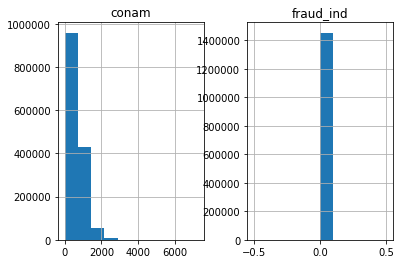

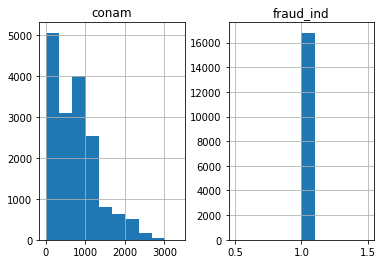

In [25]:
train_raw[["conam", "fraud_ind"]].groupby("fraud_ind", as_index=None).hist()

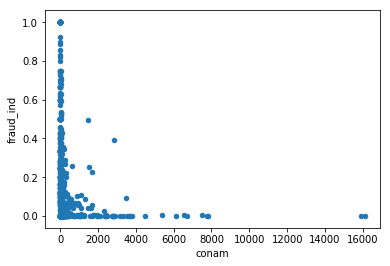

In [28]:
train_raw[["acqic", "conam", "fraud_ind"]].\
            groupby("acqic").agg({"conam": lambda x: x.unique().shape[0], "fraud_ind": 'mean'}).plot.scatter("conam", "fraud_ind")

#### 盜刷一次就盜一堆

In [ ]:
train_raw.loc[train_raw["acqic"].eq(6869)] # , "fraud_ind"

In [ ]:
all_features.loc[all_features["acqic"].eq(6869)]

In [ ]:
train_raw.loc[train_raw["acqic"].eq(0) & train_raw["fraud_ind"].eq(1), 
              cat_colnames + ["conam", "locdt", "loctm"] + ["fraud_ind"]]

In [ ]:
train_raw.loc[train_raw["mchno"].eq(103106)  & train_raw["fraud_ind"].eq(0), 
              cat_colnames + ["conam", "locdt", "loctm"] + ["fraud_ind"] ]

In [ ]:
train_raw[["acqic", "conam", "fraud_ind"]].groupby("acqic").mean()

In [ ]:
#### 參考pre13 -> locdt loctm很重要

In [18]:
cocam_u_cnt_by_acqic = all_features[["acqic", "conam"]].groupby("acqic", as_index=False).\
                                    agg({"conam": lambda x: x.unique().shape[0]})
cocam_u_cnt_by_acqic.columns = ["acqic", "cocam_u_cnt_by_acqic"]
all_features = pd.merge(all_features, cocam_u_cnt_by_acqic, left_on='acqic', right_on="acqic", how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,txkey,loctm_hour,loctm_min,loctm_sec,no,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,cocam_u_cnt_by_acqic
0,6716,12765,101514,966.58,4,62,0,2,0,0,...,1119159,0,0,29,0,86429,1440.483333,24.008056,0,17722.0
1,5575,34837,60869,1071.10,5,62,1,8,0,0,...,641444,0,0,40,1,86440,1440.666667,24.011111,0,2175.0
2,6769,22630,110573,438.21,5,62,0,5,0,0,...,188670,0,0,45,2,86445,1440.750000,24.012500,0,17969.0


#### (特徵) groupby acqic收單行代碼&帳戶代號
同個收單行Handle的帳戶越多個越容易盜刷 (卡號也差不多pattern)

In [26]:
train_raw[["acqic", "bacno", "fraud_ind"]].\
            groupby("acqic").agg({"bacno": lambda x: x.unique().shape[0], "fraud_ind": 'mean'})

,bacno,fraud_ind
acqic,,
0,12808,0.000213
1,9,0.000000
2,3,0.000000
3,5,0.000000
4,1,0.000000
5,3,0.000000
6,1,0.000000
7,7,0.000000
8,21,0.000000


In [27]:
bacno_u_cnt_by_acqic = all_features[["acqic", "bacno"]].groupby("acqic", as_index=False).\
                                    agg({"bacno": lambda x: x.unique().shape[0]})
bacno_u_cnt_by_acqic.columns = ["acqic", "bacno_u_cnt_by_acqic"]
all_features = pd.merge(all_features, bacno_u_cnt_by_acqic, left_on='acqic', right_on="acqic", how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,txkey,loctm_hour,loctm_min,loctm_sec,no,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,bacno_u_cnt_by_acqic
0,6716,12765,101514,966.58,4,62,0,2,0,0,...,1119159,0,0,29,0,86429,1440.483333,24.008056,0,74622
1,5575,34837,60869,1071.10,5,62,1,8,0,0,...,641444,0,0,40,1,86440,1440.666667,24.011111,0,2030
2,6769,22630,110573,438.21,5,62,0,5,0,0,...,188670,0,0,45,2,86445,1440.750000,24.012500,0,72630


#### TODO: 也觀察一下其它特徵

#### (特徵) 交易金額越大，頃向盜刷機率越高 --> 交易金額level特徵

In [11]:
print(train_raw.loc[(train_raw["conam"] < 1000), "fraud_ind"].mean())
print(train_raw.loc[(train_raw["conam"] > 1000), "fraud_ind"].mean())
print(train_raw.loc[(train_raw["conam"] > 2000), "fraud_ind"].mean())
print(train_raw.loc[(train_raw["conam"] > 3000), "fraud_ind"].mean())
print(train_raw.loc[(train_raw["conam"] > 4000), "fraud_ind"].mean())

0.008499736086717783
0.015861583277313615
0.041166077738515904
0.007113821138211382
0.0


In [28]:
all_features["conam_level"] = 0
all_features.loc[(all_features["conam"] > 1000), "conam_level"] = 1
all_features.loc[(all_features["conam"] > 2000), "conam_level"] = 2
all_features.loc[(all_features["conam"] > 3000), "conam_level"] = 3
print(all_features["conam_level"])

0          0
1          1
2          0
3          1
4          0
5          1
6          0
7          0
8          0
9          0
10         2
11         0
12         0
13         0
14         1
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
1892473    0
1892474    0
1892475    0
1892476    1
1892477    2
1892478    0
1892479    0
1892480    1
1892481    0
1892482    0
1892483    0
1892484    0
1892485    0
1892486    0
1892487    0
1892488    1
1892489    0
1892490    0
1892491    0
1892492    0
1892493    0
1892494    0
1892495    0
1892496    0
1892497    0
1892498    0
1892499    0
1892500    0
1892501    0
1892502    0
Name: conam_level, Length: 1892503, dtype: int64


In [19]:
train_raw.loc[train_raw["conam"].between(100, 1000) , ["conam", "fraud_ind"]].groupby("conam").sum()

,fraud_ind
conam,
100.0,1
101.0,177
102.0,440
103.0,618
104.0,137
105.0,3
106.0,17
107.0,1
108.0,9


In [47]:
train_raw["conam_round"].unique().shape # .groupby("conam_round")

(72961,)

#### 計算交易日期的count數當feature

In [ ]:
# locdt_CNT = pd.DataFrame(all_features["locdt"].value_counts()).reset_index()
# locdt_CNT.columns = ["locdt", "locdt_value_counts"]

# all_features = pd.merge(all_features, locdt_CNT, left_on='locdt', right_on="locdt", how='left')
# all_features.head(3)

In [ ]:
pd.DataFrame(all_features["locdt"].value_counts()).reset_index().sort_values("index").hist()

#### (特徵)  每個交易時間點(時+分+秒)在整個資料集出現次數

In [29]:
loctm_CNT = pd.DataFrame(all_features["loctm"].value_counts()).reset_index()
loctm_CNT.columns = ["loctm", "loctm_value_counts"]

all_features = pd.merge(all_features, loctm_CNT, left_on='loctm', right_on="loctm", how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,loctm_min,loctm_sec,no,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts
0,6716,12765,101514,966.58,4,62,0,2,0,0,...,0,29,0,86429,1440.483333,24.008056,0,74622,0,16
1,5575,34837,60869,1071.10,5,62,1,8,0,0,...,0,40,1,86440,1440.666667,24.011111,0,2030,1,19
2,6769,22630,110573,438.21,5,62,0,5,0,0,...,0,45,2,86445,1440.750000,24.012500,0,72630,0,11


#### (特徵)  每個交易時間點(時)在整個資料集出現次數

In [30]:
loctm_hour_CNT = pd.DataFrame(all_features["loctm_hour"].value_counts()).reset_index()
loctm_hour_CNT.columns = ["loctm_hour", "loctm_hour_value_counts"]

all_features = pd.merge(all_features, loctm_hour_CNT, left_on='loctm_hour', right_on="loctm_hour", how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,loctm_sec,no,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts,loctm_hour_value_counts
0,6716,12765,101514,966.58,4,62,0,2,0,0,...,29,0,86429,1440.483333,24.008056,0,74622,0,16,32703
1,5575,34837,60869,1071.10,5,62,1,8,0,0,...,40,1,86440,1440.666667,24.011111,0,2030,1,19,32703
2,6769,22630,110573,438.21,5,62,0,5,0,0,...,45,2,86445,1440.750000,24.012500,0,72630,0,11,32703


#### (特徵)  每個交易時間點(分)在整個資料集出現次數

In [ ]:
# loctm_min_CNT = pd.DataFrame(all_features["loctm_min"].value_counts()).reset_index()
# loctm_min_CNT.columns = ["loctm_min", "loctm_min_value_counts"]

# all_features = pd.merge(all_features, loctm_min_CNT, left_on='loctm_min', right_on="loctm_min", how='left')
# all_features.head(3)

#### (特徵)  每個交易時間點(秒)在整個資料集出現次數

In [ ]:
# loctm_sec_CNT = pd.DataFrame(all_features["loctm_sec"].value_counts()).reset_index()
# loctm_sec_CNT.columns = ["loctm_sec", "loctm_sec_value_counts"]

# all_features = pd.merge(all_features, loctm_sec_CNT, left_on='loctm_sec', right_on="loctm_sec", how='left')
# all_features.head(3)

#### TODO:可以分零期的vs其他

In [ ]:
print("分期期數:\n", train_raw["iterm"].value_counts())
train_raw[["iterm", "conam"]].groupby("iterm").mean()

### 是否為國外刷卡?

In [ ]:
all_features[["stocn", "csmcu"]].plot.scatter("stocn", "csmcu")
plt.show()

In [ ]:
all_features[["scity", "csmcu"]].plot.scatter("scity", "csmcu")
plt.show()

#### TODO: 在某些城市消費必盜刷?

In [31]:
train_raw[["scity", "fraud_ind"]].groupby("scity").mean()
train_raw.loc[train_raw["scity"].eq(52), "fraud_ind"]

840303    1
775679    1
180771    1
406627    1
436922    1
159389    1
Name: fraud_ind, dtype: int64

In [32]:
train_raw.loc[train_raw["scity"].eq(52)]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
840303,5759,26733,45165,1014.37,5,61,1,8,0,0,...,0,12,70330.0,210,56956,0,52,96,2,659173
775679,6375,102618,59398,1009.70,5,61,1,2,0,0,...,0,45,72925.0,210,56956,0,52,96,2,1880755
180771,6375,102618,59398,1009.35,5,61,1,2,0,0,...,0,43,64356.0,210,56956,0,52,96,2,1878478
406627,5759,26733,45165,1014.37,5,61,1,8,0,0,...,0,11,71803.0,210,56956,0,52,96,2,657079
436922,6375,102618,59398,1009.35,5,61,1,2,0,0,...,0,42,72351.0,210,56956,0,52,96,2,1877526
159389,5759,111122,197061,1007.96,5,61,1,8,0,0,...,0,39,70936.0,210,56956,0,52,96,2,705305


#### (特徵) 在每個國家、城市之曾經出現的消費幣別種類特徵

In [33]:
csmcu_cnt_by_stocn = pd.DataFrame(all_features[["stocn", "csmcu"]].drop_duplicates().groupby("stocn").count()).reset_index()
csmcu_cnt_by_stocn.columns = ["stocn", "csmcu_cnt_by_stocn"]

all_features = pd.merge(all_features, csmcu_cnt_by_stocn, left_on='stocn', right_on="stocn", how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,no,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts,loctm_hour_value_counts,csmcu_cnt_by_stocn
0,6716,12765,101514,966.58,4,62,0,2,0,0,...,0,86429,1440.483333,24.008056,0,74622,0,16,32703,9
1,5575,34837,60869,1071.10,5,62,1,8,0,0,...,1,86440,1440.666667,24.011111,0,2030,1,19,32703,9
2,6769,22630,110573,438.21,5,62,0,5,0,0,...,2,86445,1440.750000,24.012500,0,72630,0,11,32703,9


In [34]:
csmcu_cnt_by_scity = pd.DataFrame(all_features[["scity", "csmcu"]].drop_duplicates().groupby("scity").count()).reset_index()
csmcu_cnt_by_scity.columns = ["scity", "csmcu_cnt_by_scity"]

all_features = pd.merge(all_features, csmcu_cnt_by_scity, left_on='scity', right_on="scity", how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,total_acc_sec,total_acc_min,total_acc_hour,conam_is_0,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts,loctm_hour_value_counts,csmcu_cnt_by_stocn,csmcu_cnt_by_scity
0,6716,12765,101514,966.58,4,62,0,2,0,0,...,86429,1440.483333,24.008056,0,74622,0,16,32703,9,5
1,5575,34837,60869,1071.10,5,62,1,8,0,0,...,86440,1440.666667,24.011111,0,2030,1,19,32703,9,8
2,6769,22630,110573,438.21,5,62,0,5,0,0,...,86445,1440.750000,24.012500,0,72630,0,11,32703,9,2


#### (特徵) 每個帳號在資料集中曾經消費過的之不同種類的幣別數
帳號消費過的幣別種類越多，可能容易有盜刷發生

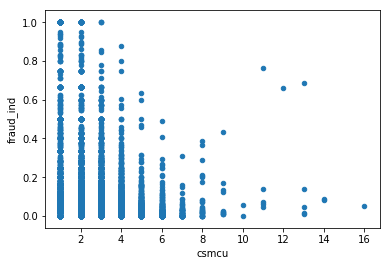

In [35]:
pd.DataFrame(train_raw[["bacno", "csmcu", "fraud_ind"]].\
                    groupby(["bacno"]).agg({"csmcu": lambda x: x.unique().shape[0], "fraud_ind": 'mean'})).\
                    sort_values("csmcu", ascending=False).reset_index(drop=True)[["csmcu", "fraud_ind"]]\
                    .plot.scatter(x="csmcu", y="fraud_ind")

In [36]:
csmcu_ucnt_by_bacno = pd.DataFrame(all_features[["bacno", "csmcu"]].groupby(["bacno"])["csmcu"].apply(lambda x: x.unique().shape[0]))

csmcu_ucnt_by_bacno = pd.DataFrame(csmcu_ucnt_by_bacno).reset_index()
csmcu_ucnt_by_bacno.columns = ["bacno", "csmcu_ucnt_by_bacno"]

all_features = pd.merge(all_features, csmcu_ucnt_by_bacno, left_on='bacno', right_on='bacno', how='left')
all_features.head(3)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,total_acc_min,total_acc_hour,conam_is_0,bacno_u_cnt_by_acqic,conam_level,loctm_value_counts,loctm_hour_value_counts,csmcu_cnt_by_stocn,csmcu_cnt_by_scity,csmcu_ucnt_by_bacno
0,6716,12765,101514,966.58,4,62,0,2,0,0,...,1440.483333,24.008056,0,74622,0,16,32703,9,5,1
1,5575,34837,60869,1071.10,5,62,1,8,0,0,...,1440.666667,24.011111,0,2030,1,19,32703,9,8,2
2,6769,22630,110573,438.21,5,62,0,5,0,0,...,1440.750000,24.012500,0,72630,0,11,32703,9,2,2


#### (特徵) 每個類別在資料集出現的總次數特徵

In [37]:
for cat in cat_colnames:
    x = pd.DataFrame(all_features[cat].value_counts()).reset_index()
    x.columns = [cat, cat + "_value_counts"]
    all_features = pd.merge(all_features, x, left_on=cat, right_on=cat, how='left')
all_features.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,contp_value_counts,etymd_value_counts,stocn_value_counts,scity_value_counts,stscd_value_counts,ovrlt_value_counts,flbmk_value_counts,hcefg_value_counts,csmcu_value_counts,flg_3dsmk_value_counts
0,6716,12765,101514,966.58,4,62,0,2,0,0,...,90734,468818,1647520,914662,1874923,1868617,1886127,1759496,1553694,1811264
1,5575,34837,60869,1071.10,5,62,1,8,0,0,...,1696824,292757,5016,4956,1874923,1868617,1886127,1759496,1553694,1811264
2,6769,22630,110573,438.21,5,62,0,5,0,0,...,1696824,511459,1647520,50563,1874923,1868617,1886127,1759496,1553694,1811264
3,6767,91588,208961,1174.17,5,62,0,5,0,0,...,1696824,511459,1647520,914662,1874923,1868617,1886127,1759496,1553694,1811264
4,3198,84148,180103,367.29,5,60,0,5,0,0,...,1696824,511459,46984,7,1874923,1868617,1886127,1759496,4026,1811264


__Distributions:__ By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

### 有點偏，先不做transformation (log/scaling/..)
##### TODO: 交易時間特定的時間出現比較頻繁，將盜刷熱門時段釐清並隔出來看造特徵

#### 每天早上9點到晚上11點之間是信用卡消費的高頻時間段。

In [ ]:
sns.factorplot(x="loctm_hour", data=all_features, kind="count", palette="ocean", size=6, aspect=3)

#### 盜刷交易、交易金額和交易時間的關係
- 上面是有盜刷的 x為時間、y為盜刷金額
- 下面是正常的 x為時間、y為消費金額

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6)) 
ax1.scatter(train_raw["loctm_hour"][train_raw["fraud_ind"] == 1], train_raw["conam"][train_raw["fraud_ind"] == 1]) 
ax1.set_title('Fraud') 
ax2.scatter(train_raw["loctm_hour"][train_raw["fraud_ind"] == 0], train_raw["conam"][train_raw["fraud_ind"] == 0]) 
ax2.set_title('Normal') 
plt.xlabel('Time (in Hours)') 
plt.ylabel('Amount')
plt.show()

In [ ]:
f, ax = plt.subplots(1, 1, sharex=True, figsize=(16,6)) 
ax.scatter(train_raw["loctm_hour"], train_raw["conam"], c=train_raw["fraud_ind"])

In [ ]:
Y = train_raw[["loctm_hour", "fraud_ind"]].groupby("loctm_hour")["fraud_ind"].sum()
Z = train_raw[["loctm_hour", "fraud_ind"]].groupby("loctm_hour")["fraud_ind"].size() - \
    train_raw[["loctm_hour", "fraud_ind"]].groupby("loctm_hour")["fraud_ind"].sum()
X = Y.index.values

plt.bar(X, Y) # offset of -0.4
plt.show()

plt.bar(X, Z) # offset of  0.4
plt.show()

#### (特徵) 是否為正常刷卡熱門時段 (9~21點)

In [38]:
all_features["prime_time_normal"] = all_features["loctm_hour"].between(9, 21, inclusive=True).astype(int)

#### (特徵) 是否為盜刷熱門時段 (早上11點至凌晨4點)

In [39]:
all_features["prime_time_fraud"] = (all_features["loctm_hour"].between(11, 23, inclusive=True) | \
 all_features["loctm_hour"].between(0, 4, inclusive=True)).astype(int)

#### (特徵) 是否為睡覺時間 (0~7)

In [40]:
all_features["sleep_time"] = all_features["loctm_hour"].between(0, 7, inclusive=True).astype(int)

#### 是睡覺時間且金額小於3000

In [41]:
all_features["sleep_time_conam_lower_3000"] = ((all_features["sleep_time"] == 1) & (all_features["conam"] <= 3000)).astype(int)

#### 是盜刷熱門時間且金額小於3000

In [42]:
all_features["prime_time_fraud_conam_lower_3000"] = ((all_features["prime_time_fraud"] == 1) & (all_features["conam"] <= 3000)).astype(int)

In [ ]:
print("Fraud Stats Summary") 
print(train_raw["conam"][train_raw["fraud_ind"] == 1].describe()) 
print("Normal Stats Summary") 
print(train_raw["conam"][train_raw["fraud_ind"] == 0].describe())

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(18,10))

amount_val = train_raw['conam'].values
time_val = train_raw['loctm'].values / 3600
amount_val_test = test_raw['conam'].values
time_val_test = test_raw['loctm'].values / 3600

sns.distplot(amount_val, ax=ax[0, 0], color='r')
ax[0, 0].set_title('Distribution of Transaction Amount (Train Set)', fontsize=14)
ax[0, 0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[0, 1], color='b')
ax[0, 1].set_title('Distribution of Transaction Time (Train Set)', fontsize=14)
ax[0, 1].set_xlim([min(time_val), max(time_val)])

sns.distplot(amount_val_test, ax=ax[1, 0], color='g')
ax[1, 0].set_title('Distribution of Transaction Amount (Test Set)', fontsize=14)
ax[1, 0].set_xlim([min(amount_val_test), max(amount_val_test)])

sns.distplot(time_val_test, ax=ax[1, 1], color='y')
ax[1, 1].set_title('Distribution of Transaction Time (Test Set)', fontsize=14)
ax[1, 1].set_xlim([min(time_val_test), max(time_val_test)])

plt.show()

### Transformation for all features (X)

In [ ]:
# Transformation
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# all_features['scaled_conam'] = rob_scaler.fit_transform(all_features['conam'].values.reshape(-1,1))
# all_features['scaled_loctm'] = rob_scaler.fit_transform(all_features['loctm'].values.reshape(-1,1))

# Plot
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = all_features['scaled_conam'].values
time_val = all_features['scaled_loctm'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time (Train Set)', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

# df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = train_raw['locdt'].values
time_val = train_raw['iterm'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Date', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Intervals', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

## 資料拆離與輸出

#### 將資料集串回原本順序

In [43]:
all_features = pd.merge(key_data, all_features, left_on="txkey", right_on="txkey", how='left')
all_features

,txkey,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,...,ovrlt_value_counts,flbmk_value_counts,hcefg_value_counts,csmcu_value_counts,flg_3dsmk_value_counts,prime_time_normal,prime_time_fraud,sleep_time,sleep_time_conam_lower_3000,prime_time_fraud_conam_lower_3000
0,1065617,5975,160800,155123,490.19,5,62,1,8,0,...,1868617,1886127,1759496,1553694,81239,0,1,0,0,1
1,1814145,5975,97584,55835,1.38,5,62,1,8,0,...,1868617,1886127,1759496,1553694,1811264,0,0,0,0,0
2,1028226,6777,1884,116943,683.25,5,62,0,5,0,...,1868617,1886127,41634,1553694,1811264,1,1,0,0,1
3,510958,6881,150173,105171,513.80,5,0,0,0,0,...,1868617,1886127,1759496,217237,1811264,1,1,0,0,1
4,38321,0,19942,118919,465.62,5,0,0,2,0,...,1868617,1886127,64075,217237,1811264,1,0,0,0,0
5,1865727,6189,138238,22734,254.99,5,62,1,2,0,...,1868617,1886127,1759496,1553694,1811264,0,1,0,0,1
6,1813723,5975,112451,31536,531.54,5,62,0,5,0,...,1868617,1886127,1759496,1553694,1811264,1,1,0,0,1
7,1167661,5975,39298,46263,874.16,5,62,0,4,0,...,1868617,1886127,1759496,1553694,1811264,1,1,0,0,1
8,1313909,5975,91542,32004,8.94,2,62,0,2,0,...,1868617,1886127,1759496,1553694,1811264,1,1,0,0,1
9,1565326,6716,157947,9994,1421.35,5,62,0,4,0,...,1868617,1886127,1759496,1553694,1811264,1,1,0,0,1


In [44]:
all_features.drop(["txkey"], axis=1, inplace=True)
X_train = all_features[:len(train_raw)]
X_test = all_features[len(train_raw):]

train_raw_pre = pd.concat([X_train.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
print(train_raw_pre.shape)
print(X_test.shape)

(1470838, 59)
(421665, 58)


In [45]:
train_raw_pre.to_csv("pre_train_14.csv", index=None)
X_test.to_csv("pre_test_14.csv", index=None)

## Dimensionality Reduction and Clustering

In [ ]:
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

NameError: name 'X_reduced_pca' is not defined

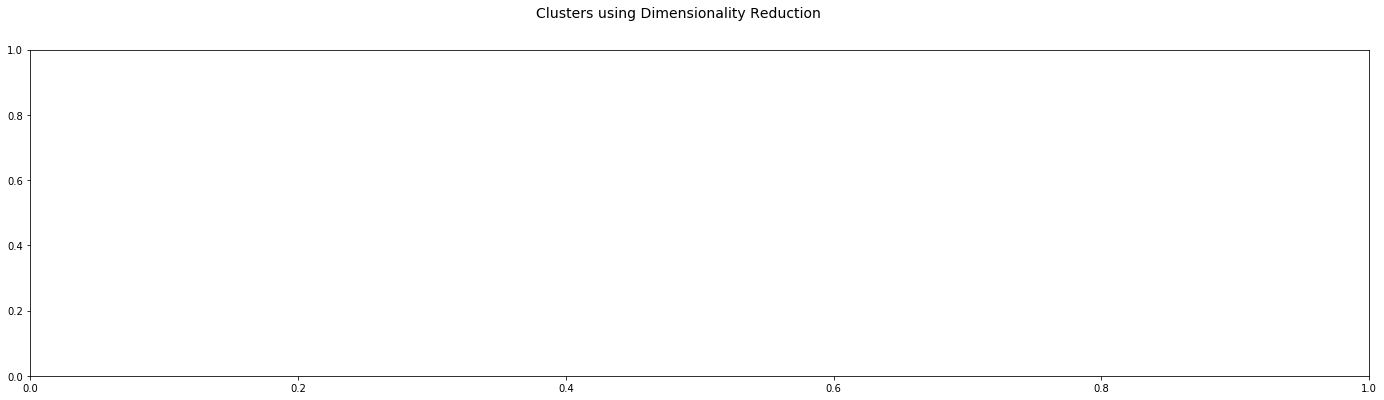

In [21]:
f, ax = plt.subplots(1, 1, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# PCA scatter plot
ax.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('PCA', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

plt.show()

## Label Propagation試試看

## SMOTE Technique (Over-Sampling):